In [4]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [5]:
### Open-loop: 30 degrees roll

Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 2.5 # MPC horizon in seconds
x0 = np.array([0, 0, 0, 0, 0, 30 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

mpc = MPCVelControl().new_controller(rocket, Ts, H)
t0 = 0
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

setting up xvel
setting up yvel
setting up zvel
setting up roll


/home/wangxinran/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=49, step=2), IntSlider(value=0,…

In [ ]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np

### Open-loop: 5 m/s v
Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 4

mpc = MPCVelControl().new_controller(rocket, Ts, H)  

x0_base = np.array([0,0,0,  0,0,0,  0,0,0,  0,0,2.0])
tests = {
    "x": np.array([5.0, 0.0, 0.0]),
    "y": np.array([0.0, 5.0, 0.0]),
    "z": np.array([0.0, 0.0, 5.0]),
}

t0 = 0

for name, v0 in tests.items():
    x0 = x0_base.copy()
    x0[6:9] = v0  # [v_x, v_y, v_z]

    u, x_ol, u_ol, t_ol = mpc.get_u(t0, x0)

    out = widgets.Output(layout={"border": "1px solid #ddd", "padding": "6px"})
    display(widgets.HTML(f"<b>Open-loop {name}</b>  v0={v0}"), out)

    with out:
        vis = RocketVis(rocket, rocket_obj_path)
        vis.anim_rate = 1.0
        vis.animate(t_ol[:-1], x_ol[:, :-1], u_ol)


setting up xvel
setting up yvel
setting up zvel
setting up roll


/home/wangxinran/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


HTML(value='<b>Open-loop x</b>  v0=[5. 0. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

HTML(value='<b>Open-loop y</b>  v0=[0. 5. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

HTML(value='<b>Open-loop z</b>  v0=[0. 0. 5.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

setting up xvel


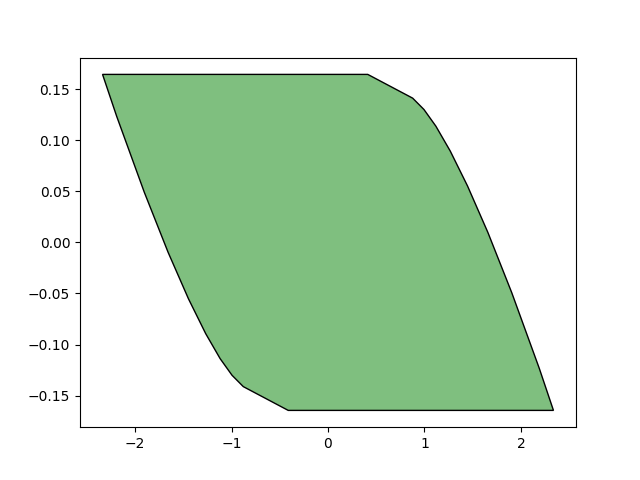

In [7]:
### invariant set plot

from LinearMPC.MPCControl_xvel import MPCControl_xvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
# omega_y, beta, v_x
x0 = np.array([0, 0, 0])
u0, x_traj, u_traj = mpc_x.get_u(x0) # x and u for single subsystem

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mpc_x.O_inf.projection(dims=(0,1)).plot(ax, color='g', opacity=0.5, show_vertices=False)



In [8]:
### Close-loop: 30 degrees roll

Ts = 0.05
sim_time = 5
H = 2
# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0 = np.array([0, 0, 0, 0, 0, 30 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

In [10]:
### Close-loop: Vx=5 m/s 

Ts = 0.05
sim_time = 5
H = 4
# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0 = np.array([0, 0, 0, 0, 0, 0, 5.0, 0, 0, 0, 0, 2.0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

In [9]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np

### Close-loop: 5 m/s v (separate x / y / z)

Ts = 0.05
sim_time = 5
H = 4

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0_base = np.array([0,0,0,  0,0,0,  0,0,0,  0,0,2.0])  # keep z=2m like before
tests = {
    "x": np.array([5.0, 0.0, 0.0]),
    "y": np.array([0.0, 5.0, 0.0]),
    "z": np.array([0.0, 0.0, 5.0]),
}

for name, v0 in tests.items():
    x0 = x0_base.copy()
    x0[6:9] = v0

    t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
        mpc, sim_time, H, x0, method="linear"
    )

    out = widgets.Output(layout={"border": "1px solid #ddd", "padding": "6px"})
    display(widgets.HTML(f"<b>Closed-loop {name}</b>  v0={v0}"), out)

    with out:
        vis = RocketVis(rocket, rocket_obj_path)
        vis.anim_rate = 1.0
        vis.animate(
            t_cl[:-1], x_cl[:, :-1], u_cl,
            T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol
        )


setting up xvel
setting up yvel
setting up zvel
setting up roll
Simulating time 0.00: 
Simulating time 0.05: 

/home/wangxinran/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating time 2.20: 
Simulating

HTML(value='<b>Closed-loop x</b>  v0=[5. 0. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

HTML(value='<b>Closed-loop y</b>  v0=[0. 5. 0.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

HTML(value='<b>Closed-loop z</b>  v0=[0. 0. 5.]')

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…